In [462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Male population has more heart disease patients than no heart disease patients. In the case of Female population, heart disease patients are less than no heart disease patients.
ASY type of chest pain boldly points towards major chances of heart disease.
Fasting Blood Sugar is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.
RestingECG does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.
With the ST_Slope values, flat slope displays a very high probability of being diagnosed with heart disease. Down also shows the same output but in very few data points.

In [463]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Attributes:

Age:Age of the patient [years]</font>

Sex: Sex of the patient [M: Male, F: Female]</font>

ChestPainType:Ch Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</font>

RestingBP: Resting blood pressure [mm Hg]</font>

Cholesterol: Serum cholesterol [mm/dl]</font>

FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</font>

RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</font>
MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]</font>

ExerciseAngina:Exercise-induced angina [Y: Yes, N: No]</font>

Oldpeak: Oldpeak = ST [Numeric value measured in depression]</font>

ST_Slope:The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</font>

HeartDisease: Output class [1: heart disease, 0: Normal]</font>

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [465]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [466]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [467]:
df.duplicated().sum()

0

Data doesn't have a duplicated value or na values.

In [468]:
df.shape

(918, 12)

In [469]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [470]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [471]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [472]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [473]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [474]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [475]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [476]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [477]:
count = df['RestingECG'].value_counts()
count

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [478]:
count.values

array([552, 188, 178], dtype=int64)

In [479]:
count.index

Index(['Normal', 'LVH', 'ST'], dtype='object', name='RestingECG')

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



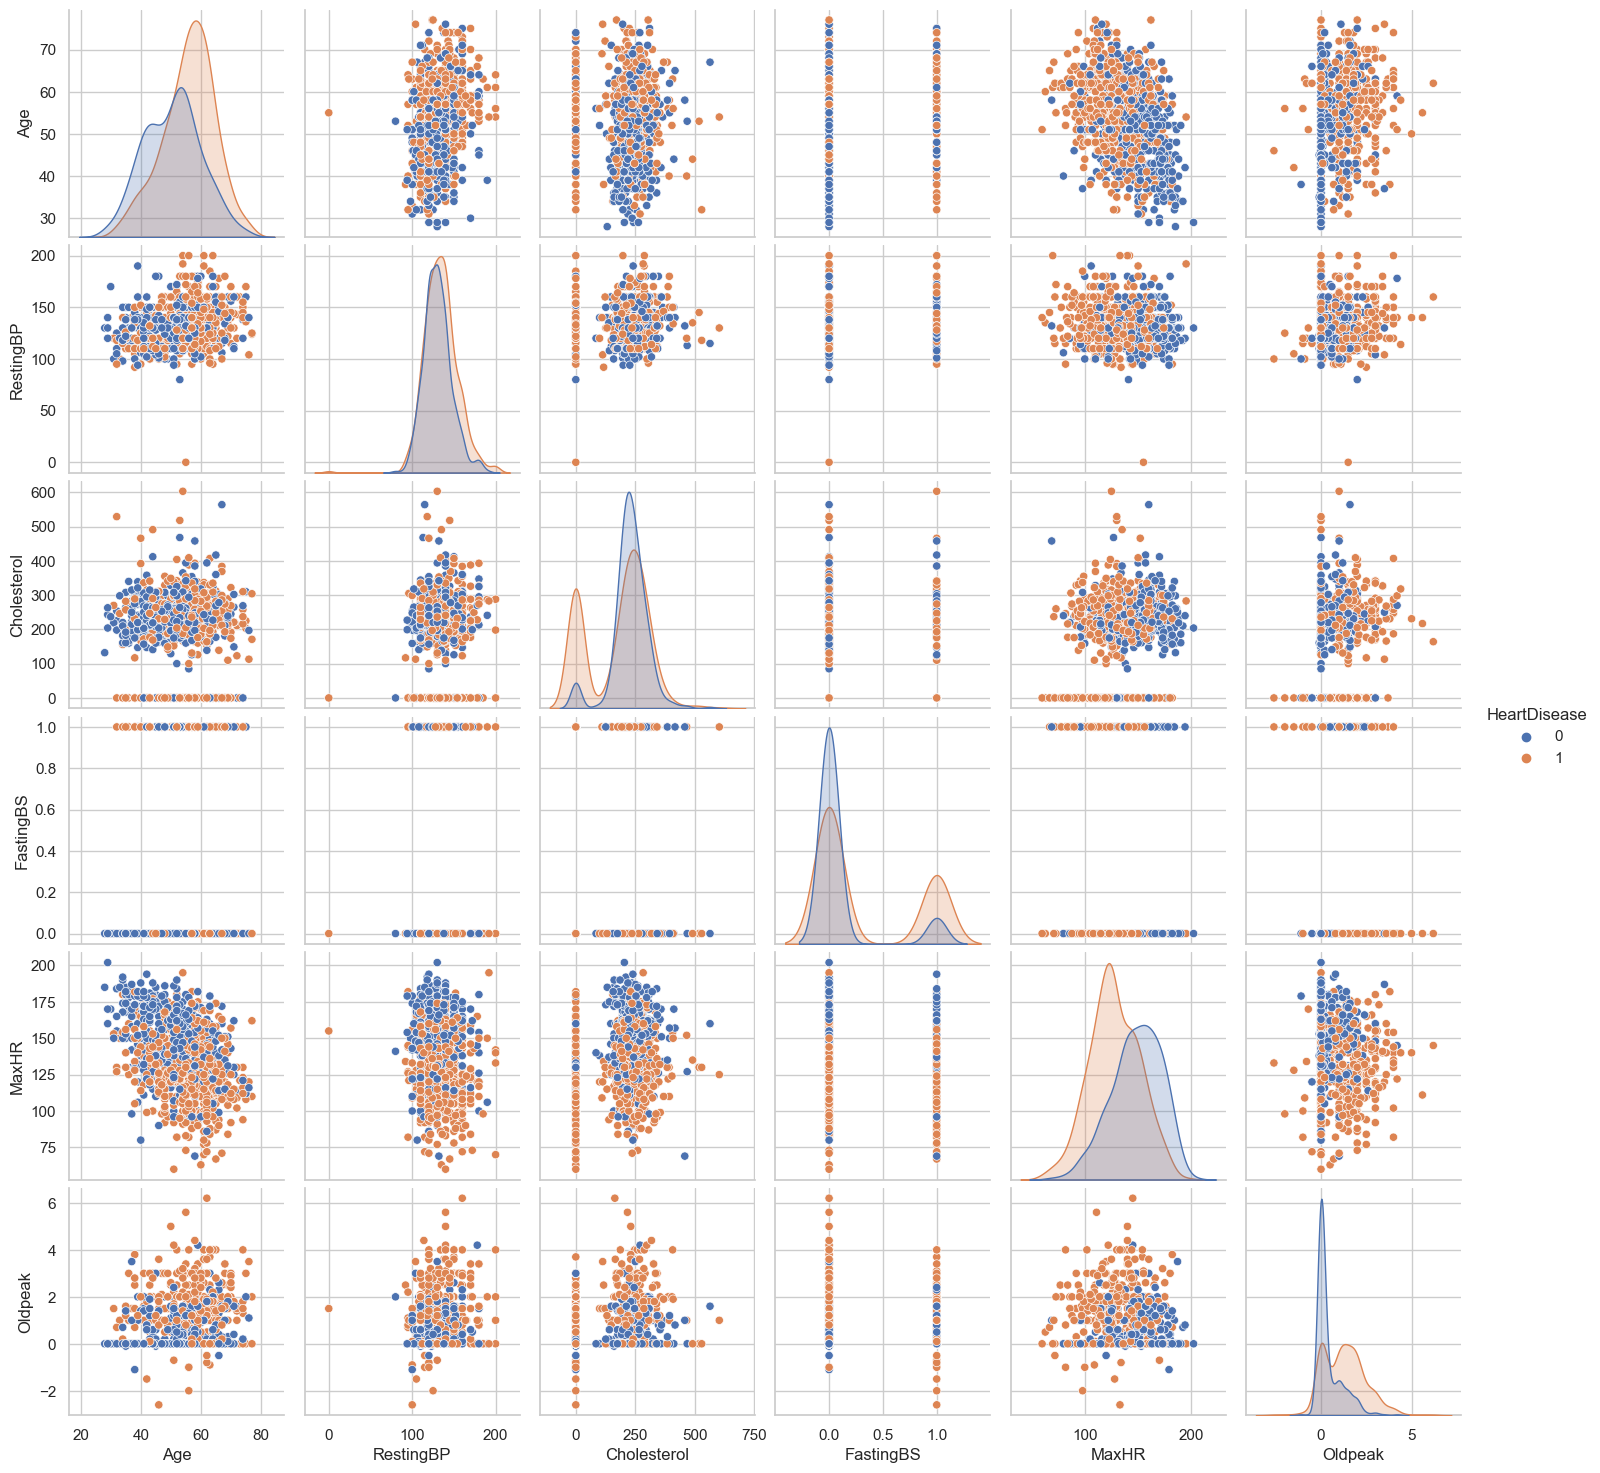

In [480]:
sn.pairplot(df, hue='HeartDisease')

#### Analysis on categorical features : 

#### Resting ECG : 

Text(0.5, 1.0, 'Distribution of Resting ECG Categories')

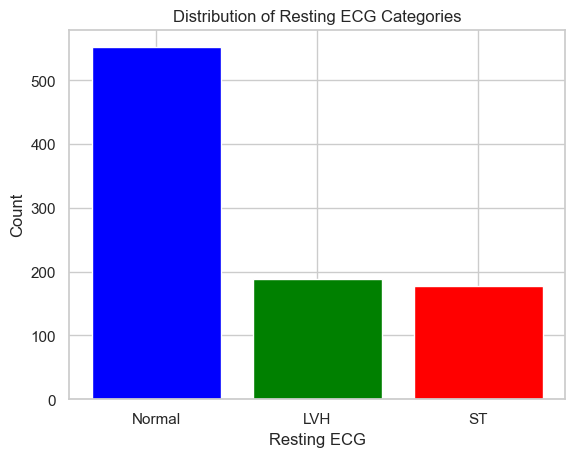

In [481]:
plt.bar(count.index, count.values, color=['blue','green','red'])

plt.xlabel('Resting ECG')
plt.ylabel('Count')
plt.title('Distribution of Resting ECG Categories')

#### Chest pain type : 

In [482]:
count_ctype = df['ChestPainType'].value_counts()
count_ctype

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of ChestPainTypes')

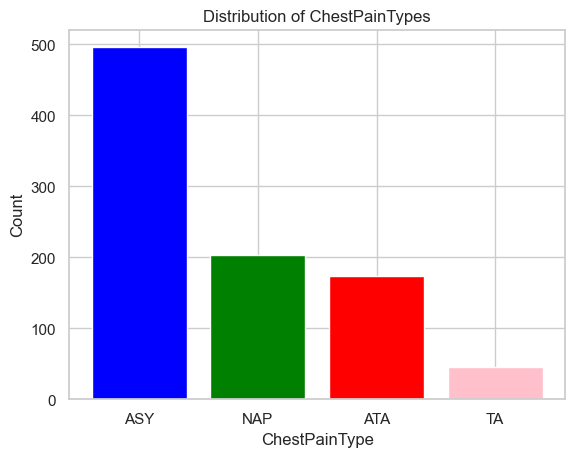

In [483]:
plt.bar(count_ctype.index, count_ctype.values, color=['blue','green','red','pink'])

plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.title('Distribution of ChestPainTypes')

The effect of chest pain type on heart disease : 

#### ST Slope : 

In [484]:
count_slope = df['ST_Slope'].value_counts()
count_slope

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Text(0.5, 1.0, 'ST Slope Distribution')

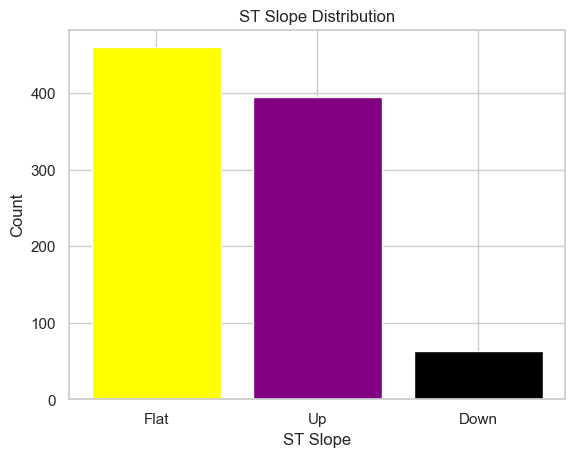

In [485]:
plt.bar(count_slope.index, count_slope.values, color=['yellow','purple','black'])

plt.xlabel('ST Slope')
plt.ylabel('Count')
plt.title('ST Slope Distribution')

#### Sex : 

In [486]:
count_sex = df['Sex'].value_counts()
count_sex

Sex
M    725
F    193
Name: count, dtype: int64

Text(0.5, 1.0, 'Sex Distribution')

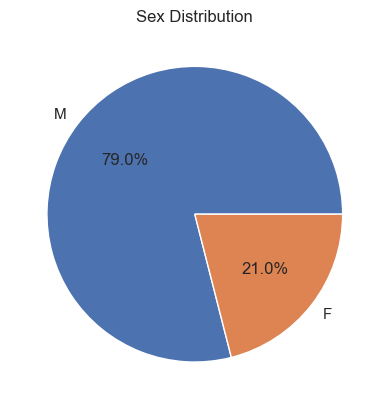

In [487]:
plt.pie(count_sex.values,labels=count_sex.index, autopct='%1.1f%%')
plt.title('Sex Distribution')

Most of the patients in the data are males.

In [488]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [489]:
male = df[df['Sex']=='M']
female = df[df['Sex']=='F']

In [490]:
male_counts = male['HeartDisease'].value_counts()
female_counts = female['HeartDisease'].value_counts()

In [491]:
colors = ['#1f77b4', '#ff7f0e']  

# Creating subplots for male and female distributions
fig = make_subplots(rows=1, cols=2, subplot_titles=('Male', 'Female'), specs=[[{'type':'domain'}, {'type':'domain'}]])


fig.add_trace(go.Pie(values=male_counts, name='Male',
                     marker=dict(colors=colors)), 1, 1)

fig.add_trace(go.Pie(values=female_counts, name='Female',
                     marker=dict(colors=colors)), 1, 2)

fig.update_traces(hole=.4)

# Customizing the overall layout, title, and annotations
fig.update_layout(title_text='The Effect of Sex on Risk of heart disease', title_font=dict(size=18), title_x=0.5, title_y=0.95,
                 annotations=[dict(text='Male', x=0.22, y=0.45, font_size=25, showarrow=False),
                 dict(text='Female', x=0.78, y=0.45, font_size=25, showarrow=False)])

# Customizing background colors
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

fig.show()



The pie chart shows that more males tend to have heart disease compared to females.

#### Exercise Angina : 

In [492]:
count_exang = df['ExerciseAngina'].value_counts()
count_exang

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Text(0.5, 1.0, 'Exercise induced angina distribution')

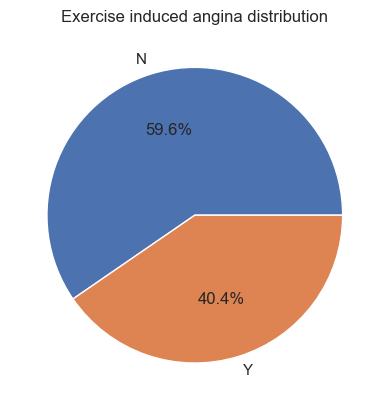

In [493]:
plt.pie(count_exang.values,labels=count_exang.index, autopct='%1.1f%%')
plt.title('Exercise induced angina distribution')

More people with no induced angina in our data.

In [494]:
df.pivot_table(index='ExerciseAngina',columns='HeartDisease',aggfunc={'HeartDisease':'count'}).style.background_gradient(cmap='Reds')

When exercise angina is Y the percentage of patients is more than the non-patients.
When exercise angina is N the percentage of non patients is more than the patients.

(-1.0999999233188131, 1.099999996348515, -1.09999925482614, 1.0999956373547308)

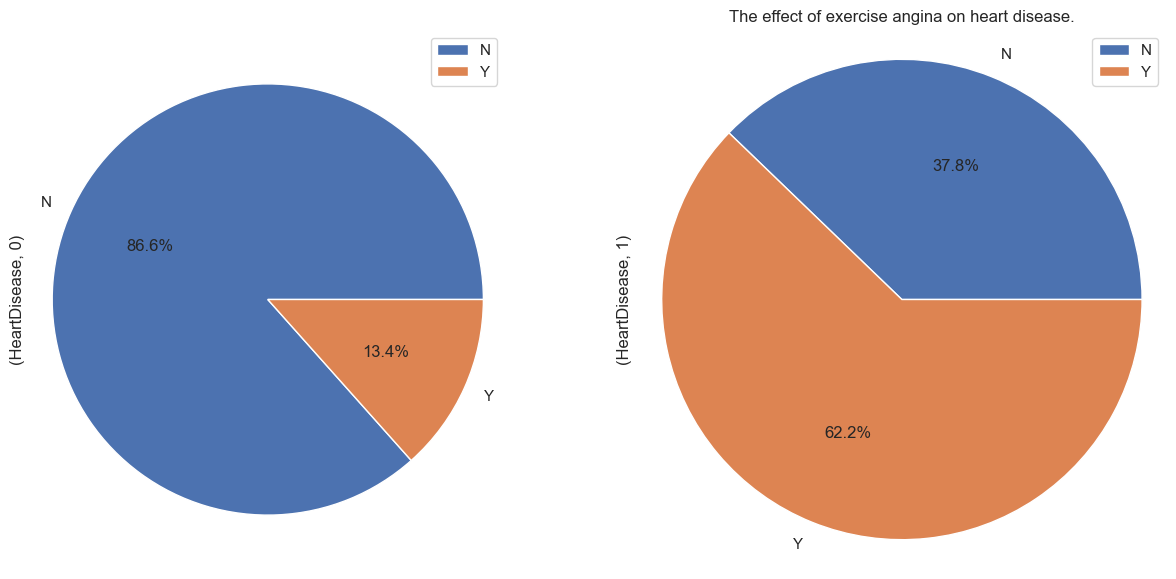

In [495]:
df.pivot_table(index='ExerciseAngina', columns='HeartDisease', aggfunc={'HeartDisease':'count'}).plot.pie(autopct='%1.1f%%', figsize=(15,7), subplots=True)
plt.title('The effect of exercise angina on heart disease.')
plt.axis('equal')

People with no exercised angina type are more likely to not have a heart disease.

#### Distribution of heart disease cases : 

Text(0.5, 1.0, 'Distribution of Heart Disease Cases')

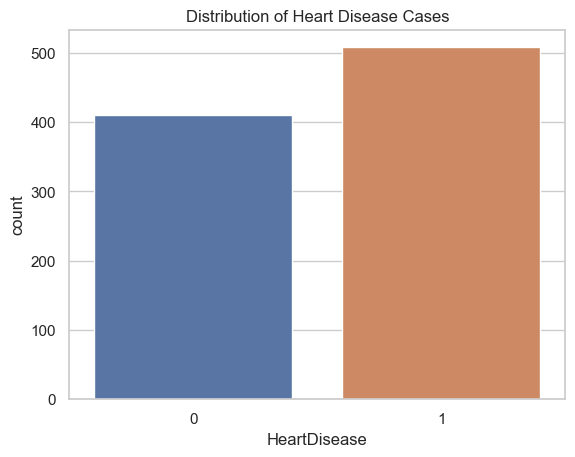

In [496]:
sn.countplot(data=df, x='HeartDisease')
plt.title('Distribution of Heart Disease Cases')

The number of patients is more than the number of healthy people in the data.

#### The relationship between categorical features and heart disease : 

##### Sex vs heart disease : 

In [497]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

Text(0.5, 1.0, 'The relationship between (sex) and (HeartDisease)')

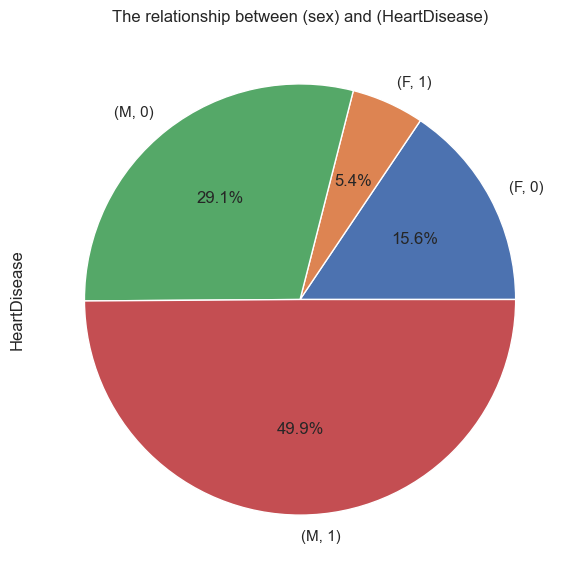

In [498]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count().plot.pie(autopct='%1.1f%%',figsize=(15,7))
plt.title('The relationship between (sex) and (HeartDisease)')

More males have heart disease than females.

##### Chest pain type  vs heart disease : 

In [499]:
df[df['HeartDisease']==1]['ChestPainType'].value_counts()

ChestPainType
ASY    392
NAP     72
ATA     24
TA      20
Name: count, dtype: int64

In [500]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### the most common type of chest pain that affects the disease : 

In [501]:
fig=px.pie(df,values='HeartDisease',names='ChestPainType',template='plotly_dark',color_discrete_sequence=px.colors.sequential.RdBu,title='The effect of the type of chest pain on the disease')
fig.update_traces(textposition='inside',textinfo='percent+label')

The order of the type of chest pain on the disease is :

1- ASY

2- NAP

3- ATA

4- TA

In [502]:
px.histogram(df,x='ChestPainType',template='plotly_dark', color='HeartDisease',histnorm='percent', barmode='group',color_discrete_sequence=['#71AEC2','#D58989'], title='The effects of chestpaintype on heart disease')

People with chest pain type asymptomatic are more prone to heart disease.

🔘 order of the type of chest pain on the disease :-

1- ASY

2- NAP

3- ATA

4- TA

##### RestingECG vs heart disease : 

In [503]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [504]:
df.groupby('HeartDisease')['RestingECG'].get_group(1).value_counts()

RestingECG
Normal    285
ST        117
LVH       106
Name: count, dtype: int64

the most type of heart disease is normal 

In [505]:
px.histogram(df, x='RestingECG', color='HeartDisease',template='plotly_dark',barmode='group',color_discrete_sequence=['grey','green'], title='The effect of RestingECG on heartdisease')

In [506]:
fig = px.pie(df, values='HeartDisease',template='plotly_dark', names='RestingECG', title='<b>The effect of RestingECG on heartdisease</b>', hole=.5, hover_data='HeartDisease',)
fig.update_layout(annotations=[dict(text='<b>RestingECG</b>', x=0.5, y=0.5, font_size=19,
                                showarrow=False)])

fig.update_traces(textposition='inside', textinfo='percent+label')



##### Exercise Angina vs heart disease : 

In [507]:
df.groupby(['ExerciseAngina','HeartDisease'])['HeartDisease'].count()

ExerciseAngina  HeartDisease
N               0               355
                1               192
Y               0                55
                1               316
Name: HeartDisease, dtype: int64

In [508]:
px.histogram(df, x='ExerciseAngina', color='HeartDisease',template='plotly_dark',barmode='group',color_discrete_sequence=['#71AEC2 ','#D58989'],title='The effect of the Exercise Angina on the disease')

##### The number of healthy people is more than the number of patients for no exercise angina.
##### The number of patients is more than the number of healthy people for yes exercise angina.

#### The effect of the slope of the peak exercise on the disease : 

##### ST Slope vs heart disease : 

In [509]:
df[df['HeartDisease']==1]['ST_Slope'].value_counts()

ST_Slope
Flat    381
Up       78
Down     49
Name: count, dtype: int64

In [510]:
px.histogram(df, x='ST_Slope',color='HeartDisease',template='plotly_dark',barmode='group',color_discrete_sequence=['#71AEC2','#D58989'], title='The effect of the slope of the peak exercise one the disease')

We observe a substantial increase in the likelihood of heart disease when the ST slope is flat, followed by Up, and finally Down.

##### FastingBS vs heart disease : 

In [511]:
df.groupby(['FastingBS','HeartDisease'])['HeartDisease'].count()

FastingBS  HeartDisease
0          0               366
           1               338
1          0                44
           1               170
Name: HeartDisease, dtype: int64

In [512]:
px.histogram(df, x='FastingBS', color='HeartDisease',template='plotly_dark', barmode='group', color_discrete_sequence=['#71AEC2','#D58989'], title='The effects of fasting blood sugar on disease')

People with fasting BS of 1 are more likely to have a heart disease.

#### The relationship between numerical features and heart disease : 

##### Maximum heart rate vs heart disease : 

C:\Users\imane\AppData\Local\Temp\ipykernel_22172\3563679259.py:1: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



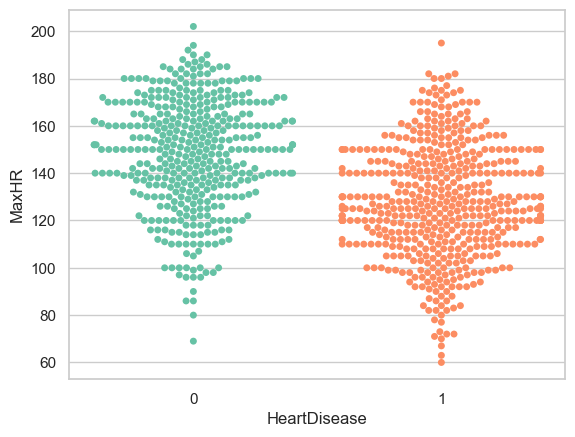

In [513]:
sn.swarmplot(data=df, x='HeartDisease', y='MaxHR', palette='Set2')

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Text(0.5, 1.0, 'Distribution of maximum heart rate by heart disease')

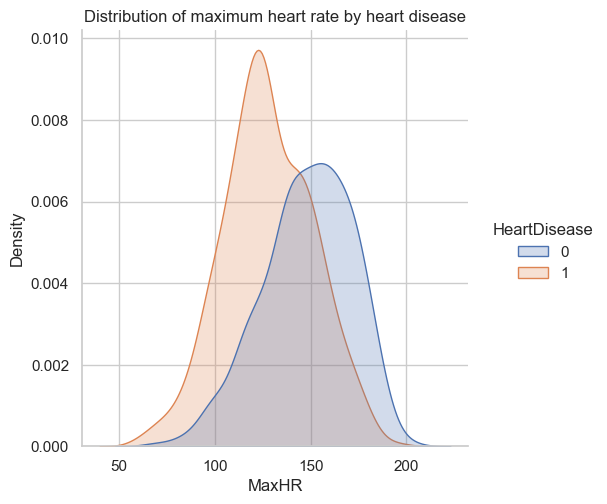

In [514]:
sn.displot(data= df, x='MaxHR',hue='HeartDisease',kind='kde',fill=True)
plt.title('Distribution of maximum heart rate by heart disease')

In [515]:
df['MaxHR_cat'] = pd.cut(df['MaxHR'],3) # deviding the column into 3 sections equally, each sections define the average disease.

In [516]:
df['MaxHR_cat']

0        (154.667, 202.0]
1        (154.667, 202.0]
2       (59.858, 107.333]
3      (107.333, 154.667]
4      (107.333, 154.667]
              ...        
913    (107.333, 154.667]
914    (107.333, 154.667]
915    (107.333, 154.667]
916      (154.667, 202.0]
917      (154.667, 202.0]
Name: MaxHR_cat, Length: 918, dtype: category
Categories (3, interval[float64, right]): [(59.858, 107.333] < (107.333, 154.667] < (154.667, 202.0]]

In [517]:
df[['MaxHR_cat','HeartDisease']].groupby('MaxHR_cat').mean().sort_values(by='HeartDisease', ascending=False).style.background_gradient(cmap='Blues')

,HeartDisease
MaxHR_cat,
"(59.858, 107.333]",0.812500
"(107.333, 154.667]",0.618538
"(154.667, 202.0]",0.285714


In [518]:
px.histogram(df, x='HeartDisease',facet_col='MaxHR_cat',template='plotly_dark', barmode='group', color='HeartDisease',title='The distribution of maximum heart rate achieved by disease')

##### RestingBP vs heart disease : 

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Text(0.5, 1.0, 'Distribution of resting blood sugar by heart disease')

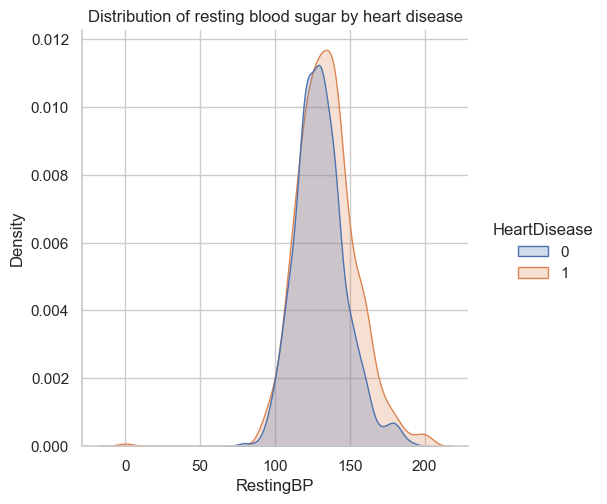

In [519]:
sn.displot(data= df, x='RestingBP',hue='HeartDisease',kind='kde',fill=True)
plt.title('Distribution of resting blood sugar by heart disease')

In [520]:
fig = px.scatter(df, x='Age', y='RestingBP', color=df['HeartDisease'].astype(str),
                 title='The Effect of Resting Blood Pressure on Heart disease. ',
                 labels={'Age': 'Age', 'RestingBP': 'Resting Blood Pressure'},
                 color_discrete_sequence=['#1f77b4', '#ff7f0e']) 
 
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')
fig.update_layout(legend_title_text='Heart Disease')

As people get older, their blood pressure tends to go up, increasing their chances of a heart disease.

##### Cholesterol vs heart disease : 

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

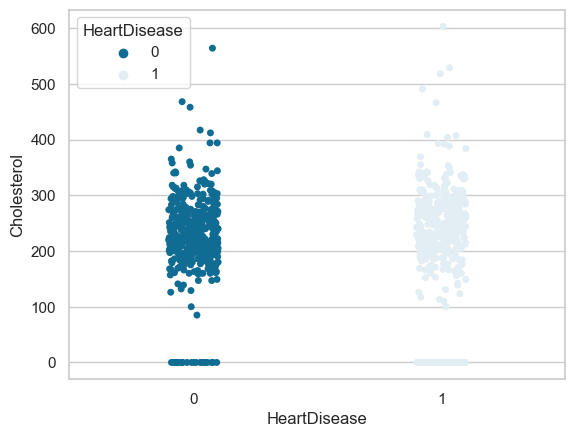

In [521]:
sn.stripplot(data= df, x='HeartDisease', y='Cholesterol', hue='HeartDisease', palette=['#106c93','#E2EEF3'], jitter=True)

##### Old peak vs heart disease : 

In [522]:
fig = px.violin(df, color='HeartDisease', x='HeartDisease',y='Oldpeak', title='<b>The effect of oldpeak on heartdisease</b>', violinmode='overlay',box=True,points='all')
fig.show()

##### Age vs heart disease : 

In [523]:
fig = px.histogram(df, x='Age', color='HeartDisease', title='The Effect of Age on heart disease',
                   labels={'age': 'Age', 'HeartDisease': 'HeartDisease'}, 
                   marginal='box', barmode='group',
                   color_discrete_sequence=['#1f77b4', '#ff7f0e']
                   )

# Customizing the layout of the histogram
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=5),  # Adjusting x-axis tick settings
    bargap=0.1  # Setting the gap between bars
)
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

# Customizing the title and its position
fig.update_layout(title_font=dict(size=18), title_x=0.5, title_y=0.95)

# Customizing the background colors
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

The graph highlights a distinctive pattern in relation to age and heart disease. Specifically, for individuals between the ages of 0 to 45, the chances of not having a heart disease surpasses that of having one. However, beyond the age of 55, the likelihood of experiencing heart disease notably increases. This observation underscores the importance of age as a significant factor in assessing the risk of cardiovascular conditions.

#### ChestPainType vs Numerical Features :

In [524]:
col = list(df.columns)
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
print('Numerical Features :',*numerical_features)

Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


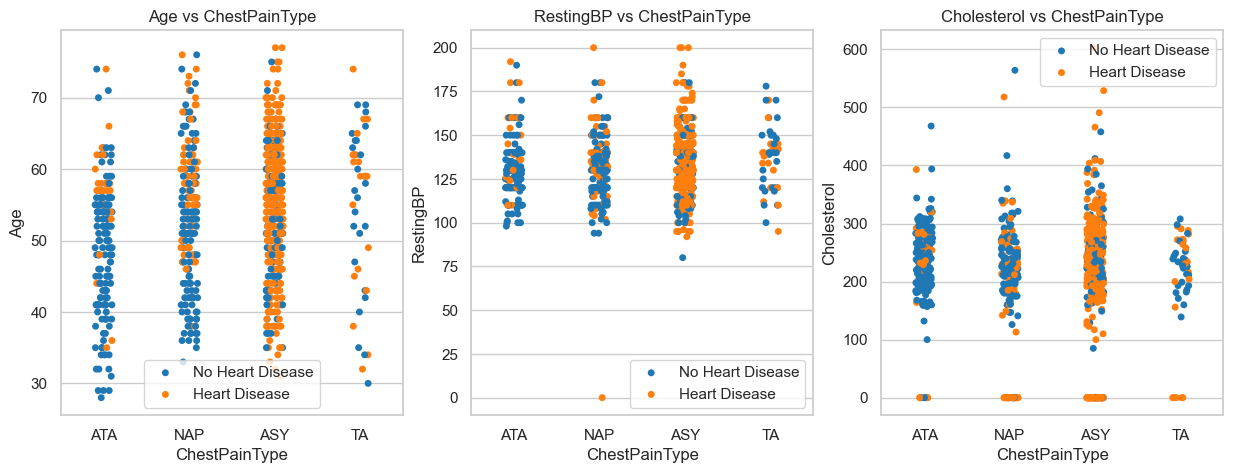

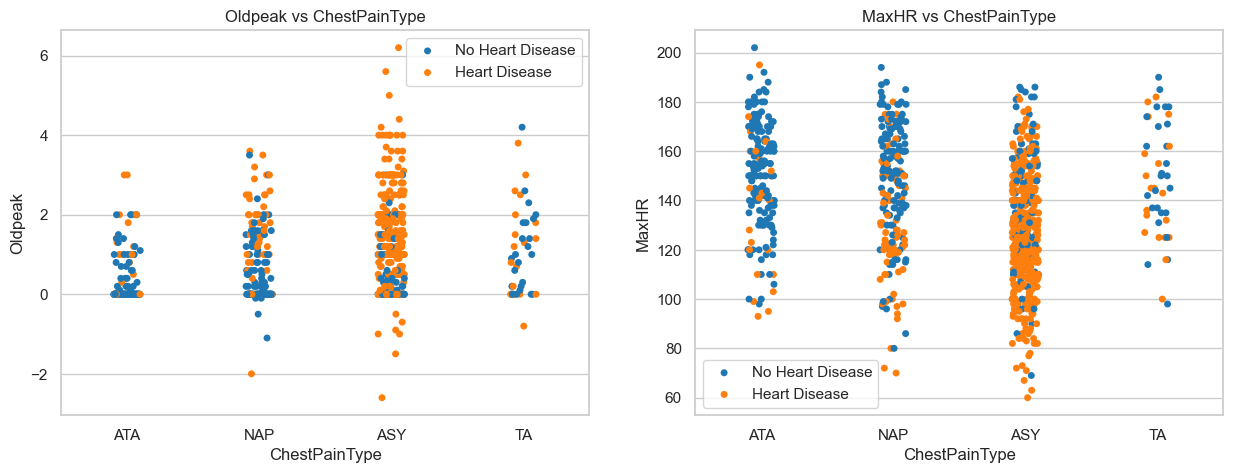

In [525]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sn.stripplot(x = 'ChestPainType',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sn.stripplot(x = 'ChestPainType',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title)

#### Continuous features exploration : 

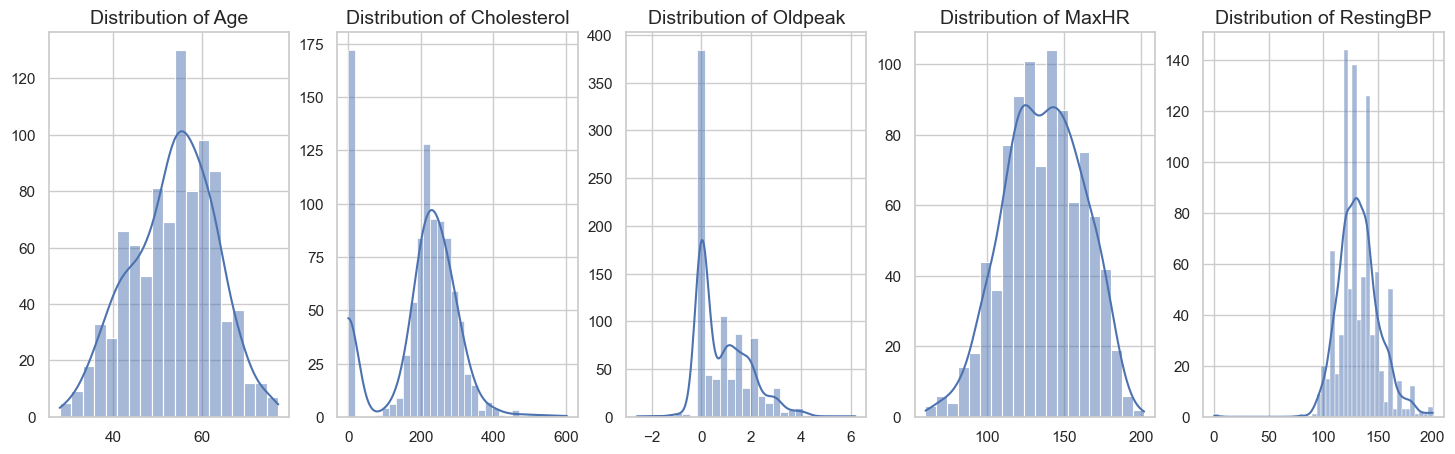

In [526]:
count_columns = ['Age','Cholesterol','Oldpeak','MaxHR','RestingBP']
fig, axis = plt.subplots(ncols=len(count_columns), figsize=(18,5))
for i, column in enumerate(count_columns):
    sn.histplot(data=df, x=column, kde=True,ax=axis[i])
    axis[i].set_title(f'Distribution of {column}', fontsize=14)
    axis[i].set_ylabel('')
    axis[i].set_xlabel('')

Some continuous features have slight skewness due to outliers.

Minor outliers exist in continuous features but align with dataset patterns.
Slight skewness in some continuous features, mainly due to outliers.

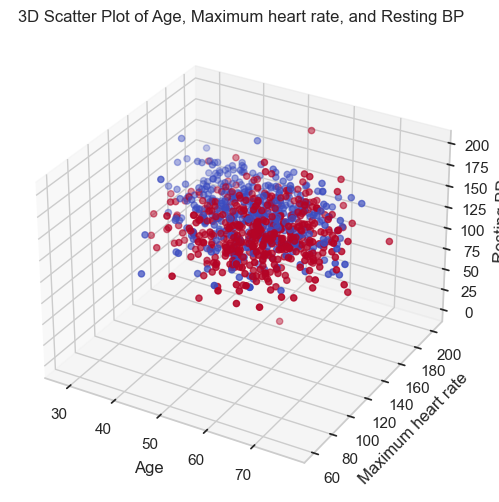

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [527]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with Age, Cholesterol, and RestingBP
ax.scatter(df['Age'], df['MaxHR'], df['RestingBP'], c=df['HeartDisease'], cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Maximum heart rate')
ax.set_zlabel('Resting BP')
plt.title('3D Scatter Plot of Age, Maximum heart rate, and Resting BP')
plt.show()



sn.set(style="whitegrid")
plt.figure(figsize=(12, 6))

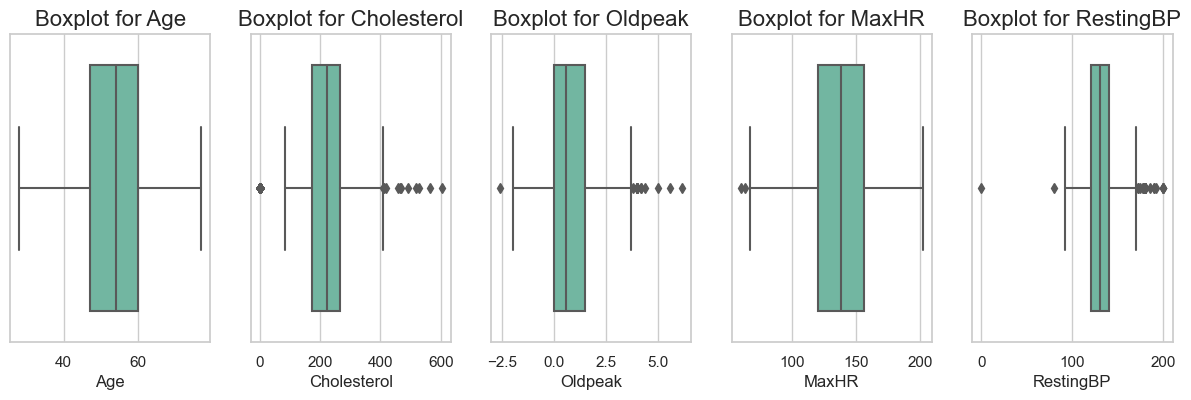

In [528]:
fig, axis = plt.subplots(1, 5, figsize=(15, 4))
for i, ax in enumerate(axis.flat):
    if i < len(count_columns):
        sn.boxplot(data=df, x=count_columns[i], ax=ax, palette='Set2', orient='h')
        ax.set_title(f'Boxplot for {count_columns[i]}', fontsize=16)

Minor Outliers were detected in the continuous features but these outliers match the dataset's overall trends and aren't data errors

#### Deleting outliers : 

In [529]:
df.shape

(918, 13)

In [530]:
for column in count_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [531]:
df.shape

(702, 13)

We removed 216 outlier.

#### Correlation matrix : 

Text(0.5, 1.0, 'Correlation Matrix')

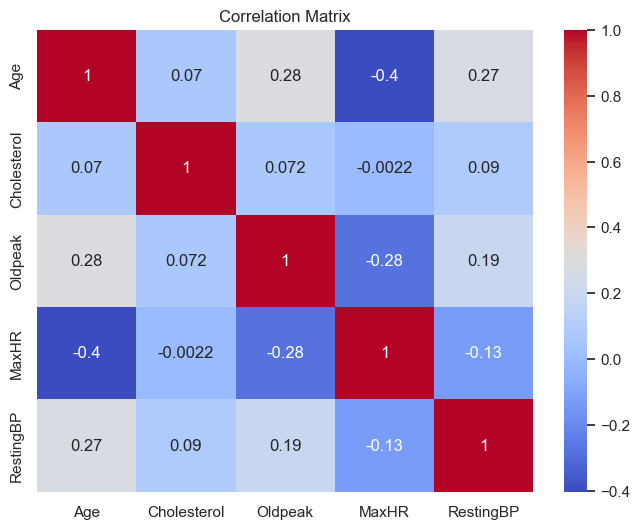

In [532]:
df_conti = df[count_columns]
correlation_matrix = df_conti.corr()

plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

## Preprocessing : 

In [533]:
df.drop('MaxHR_cat', axis=1, inplace=True)

In [534]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## Data encoding : 

Models only work with numerical values. For this reason, it is necessary to convert the categorical values of the features into numerical ones, So the machine can learn from those data and gives the right model. This process of converting categorical data into numerical data is called Encoding.

Label encoder :Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier

We first define the columns depending on their data type:

Label encoder will be applied to categorical columns.

numerical scaling numerical features which will be standardized.

In [535]:
from sklearn.preprocessing import LabelEncoder

In [536]:
dfle = df.copy()

In [537]:
dfle['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [538]:
le = LabelEncoder()

restingecg = ['Normal','LVH','ST']
chest_pain_type = ['ATA','NAP','ASY','TA']
sex = ['M','F']
exercise_angina=['N','Y']
st_slope = ['UP','FLAT','Down']

restingecg_encoded = le.fit_transform(restingecg)
chest_pain_type_encoded = le.fit_transform(chest_pain_type)
sex_encoded = le.fit_transform(sex)
exercise_angina_encoded = le.fit_transform(exercise_angina)
st_slope_encoded = le.fit_transform(st_slope)

print('RestingECG encoded : ', restingecg_encoded)
print('ChestPainType encoded : ', chest_pain_type_encoded)
print('Sex encoded : ', sex_encoded)
print('ExerciseAngina encoded : ', exercise_angina_encoded)
print('St_Slope encoded : ', st_slope_encoded)

RestingECG encoded :  [1 0 2]
ChestPainType encoded :  [1 2 0 3]
Sex encoded :  [1 0]
ExerciseAngina encoded :  [0 1]
St_Slope encoded :  [2 1 0]


In [539]:
categorical_data = ['Sex','ChestPainType','ExerciseAngina','ST_Slope','RestingECG']

In [540]:
for label in categorical_data:
    dfle[label] = le.fit_transform(dfle[label])

In [541]:
dfle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             702 non-null    int64  
 1   Sex             702 non-null    int32  
 2   ChestPainType   702 non-null    int32  
 3   RestingBP       702 non-null    int64  
 4   Cholesterol     702 non-null    int64  
 5   FastingBS       702 non-null    int64  
 6   RestingECG      702 non-null    int32  
 7   MaxHR           702 non-null    int64  
 8   ExerciseAngina  702 non-null    int32  
 9   Oldpeak         702 non-null    float64
 10  ST_Slope        702 non-null    int32  
 11  HeartDisease    702 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 57.6 KB


In [542]:
dfle.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             702 non-null    int64  
 1   Sex             702 non-null    object 
 2   ChestPainType   702 non-null    object 
 3   RestingBP       702 non-null    int64  
 4   Cholesterol     702 non-null    int64  
 5   FastingBS       702 non-null    int64  
 6   RestingECG      702 non-null    object 
 7   MaxHR           702 non-null    int64  
 8   ExerciseAngina  702 non-null    object 
 9   Oldpeak         702 non-null    float64
 10  ST_Slope        702 non-null    object 
 11  HeartDisease    702 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 71.3+ KB


In [544]:
from sklearn.preprocessing import StandardScaler
numerical_data = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
scaler = StandardScaler()

dfle[numerical_data] = scaler.fit_transform(dfle[numerical_data])


In [545]:
dfle.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.335169,0.560898,0.147121,0.547914,0.973199,-0.440315,0.113502,1.291925,-0.774008,-0.866393,0.971639,0
1,-0.390639,-1.782855,1.190340,1.845825,-1.178909,-0.440315,0.113502,0.634669,-0.774008,0.176309,-0.750812,1
2,-1.650013,0.560898,0.147121,-0.101041,0.854735,-0.440315,1.707064,-1.747885,-0.774008,-0.866393,0.971639,0
3,-0.495587,-1.782855,-0.896099,0.418123,-0.507609,-0.440315,0.113502,-1.337100,1.291976,0.697660,-0.750812,1
4,0.134100,0.560898,1.190340,1.196870,-0.882748,-0.440315,0.113502,-0.762001,-0.774008,-0.866393,0.971639,0


#### Splitting the data into training and testing set :

In [546]:
from sklearn.model_selection import train_test_split

In [547]:
X = dfle.drop('HeartDisease', axis=1)
y = dfle['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [548]:
from termcolor import colored 

In [549]:
x_train_shape=colored(X_train.shape, "yellow",None, attrs=["blink"])
x_test_shape=colored(X_test.shape, "yellow",None, attrs=["blink"])
y_train_shape=colored(y_train.shape, "yellow",None, attrs=["blink"])
y_test_shape=colored(y_test.shape, "yellow",None, attrs=["blink"])

print("x train dimensions :",x_train_shape)
print("x test dimensions: ",x_test_shape)
print("y train dimensions :",y_train_shape)
print("y test dimensions :",y_test_shape)

x train dimensions : (561, 11)
x test dimensions:  (141, 11)
y train dimensions : (561,)
y test dimensions : (141,)


## Model building and evaluation : 

In [550]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [553]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.335169,0.560898,0.147121,0.547914,0.973199,-0.440315,0.113502,1.291925,-0.774008,-0.866393,0.971639
1,-0.390639,-1.782855,1.190340,1.845825,-1.178909,-0.440315,0.113502,0.634669,-0.774008,0.176309,-0.750812
2,-1.650013,0.560898,0.147121,-0.101041,0.854735,-0.440315,1.707064,-1.747885,-0.774008,-0.866393,0.971639
3,-0.495587,-1.782855,-0.896099,0.418123,-0.507609,-0.440315,0.113502,-1.337100,1.291976,0.697660,-0.750812
4,0.134100,0.560898,1.190340,1.196870,-0.882748,-0.440315,0.113502,-0.762001,-0.774008,-0.866393,0.971639


In [574]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

Model : Logistic Regression
Training Accuracy: 0.8431372549019608
Model accuracy : 0.8581560283687943
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        71
           1       0.87      0.84      0.86        70

    accuracy                           0.86       141
   macro avg       0.86      0.86      0.86       141
weighted avg       0.86      0.86      0.86       141

------------------------------------------------------------------
Model : SVC
Training Accuracy: 0.9055258467023173
Model accuracy : 0.8936170212765957
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        71
           1       0.89      0.90      0.89        70

    accuracy                           0.89       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.89      0.89      0.89       141

---------------------------------------------

,Algorithm,Testing Accuracy,Training Accuracy
1,SVC,0.893617,0.905526
2,K-Nearest Neighbors,0.872340,0.877005
4,Naive Bayes,0.865248,0.843137
5,RandomForest,0.865248,1.000000
0,Logistic Regression,0.858156,0.843137
3,DecisionTree,0.780142,1.000000


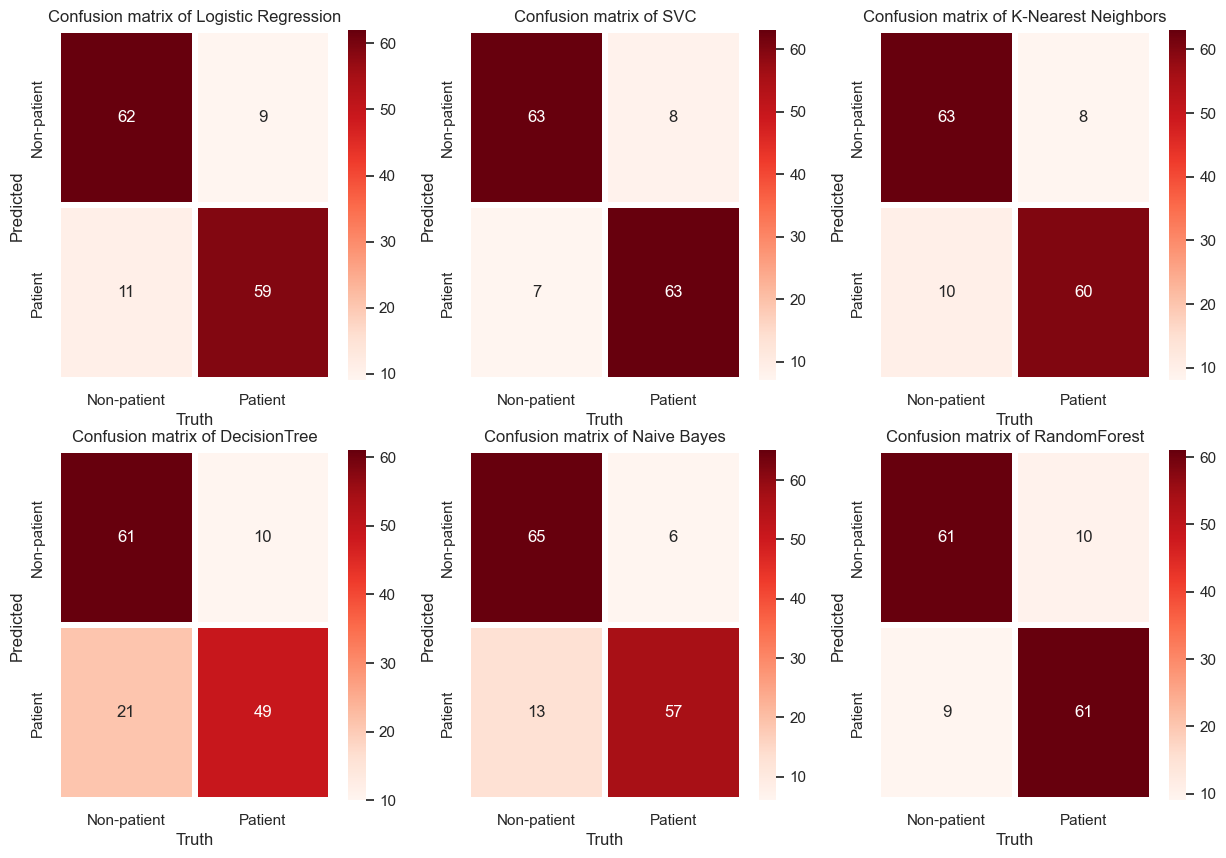

In [604]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'RandomForest' : RandomForestClassifier(), 
}
results = []
plt.figure(figsize=(15,10))
for name, classifier in models.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    training_accuracy = accuracy_score(y_train, classifier.predict(X_train))
    testing_accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Model : {name}')
    print(f'Training Accuracy: {training_accuracy}')
    print(f'Model accuracy : {testing_accuracy}')
    print(f'Classification Report:\n{report}')
    print('------------------------------------------------------------------')
    plt.subplot(2,3, list(models.keys()).index(name) + 1)
    sn.heatmap(cm, annot=True ,cmap='Reds',
                linewidth=3,fmt='',
                xticklabels=['Non-patient','Patient'],
                yticklabels=['Non-patient','Patient'])
    plt.xlabel('Truth')
    plt.ylabel('Predicted')
    plt.title(f'Confusion matrix of {name}')
    results.append({'Algorithm': name, 'Testing Accuracy':testing_accuracy,'Training Accuracy': training_accuracy})

alg_accu = pd.DataFrame(results)
alg_accu.sort_values('Testing Accuracy', ascending=False).style.background_gradient(cmap='Reds')

    


In [592]:
alg_accu

,Algorithm,Testing Accuracy,Training Accuracy
0,Logistic Regression,0.858156,0.843137
1,SVC,0.893617,0.905526
2,K-Nearest Neighbors,0.872340,0.877005
3,DecisionTree,0.780142,1.000000
4,Naive Bayes,0.865248,0.843137
5,RandomForest,0.879433,1.000000


In [593]:
data = pd.DataFrame({'Classifier': alg_accu['Algorithm'], 'Test Accuracy': alg_accu['Testing Accuracy']})

# Creating Plotly bar chart
fig = px.bar(data, x='Test Accuracy', y='Classifier', orientation='h', color='Test Accuracy',
             title='Test Accuracy Scores by Classifiers', text='Test Accuracy', color_continuous_scale='viridis')

# Customizing the layout
fig.update_layout(
    xaxis_title='Test Accuracy',
    yaxis_title='Classifier',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(categoryorder='total ascending'),
    showlegend=False,
    height=600,
    width=900
)

fig.show()

### Models prediction conclusion : 

SVC stands out as the best model with an excellent training accuracy score of 90%, testing accuracy score of 89%.

We will work on improving the SVC model to see if we can make it more accurate using hyperparameter tuning : 

In [606]:
from sklearn.model_selection import GridSearchCV

In [618]:
scores = []
model_params = { 'C': np.arange(1,10,1),
              'kernel':['rbf','linear','poly'],'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5] }

sv = SVC()

clf = GridSearchCV(sv, model_params, cv=10, return_train_score=False)
clf.fit(X_train, y_train)
y_predd =  clf.predict(X_test)
scores.append({
    'best_score': clf.best_score_,
    'best_params': clf.best_params_,
    'test_accuracy_after_hyper-parametter-tuning': accuracy_score(y_test,y_pred)
})




In [619]:
scores1 = pd.DataFrame(scores)
scores1

,best_score,best_params,test_accuracy_after_hyper-parametter-tuning
0,0.852193,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.865248


The fact that the test accuracy decreased after fine-tuning SVC suggests that the initial settings were already pretty good. Making small changes didn't make a big difference in performance.